In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 12

## Load Data

Load the most recent benchmark results from the CSV files.

In [9]:
# Look for results in parent directory (where benchmark.py saves them)
results_dir = os.path.join(os.path.dirname(os.getcwd()), 'results')

# If not found, try current directory's results folder
if not os.path.exists(results_dir):
    results_dir = 'results'

# Also check parent of notebook location
if not os.path.exists(results_dir):
    results_dir = os.path.abspath(os.path.join('..', 'results'))

print(f"Looking for results in: {results_dir}")

games_files = sorted(glob.glob(os.path.join(results_dir, 'games_*.csv')))
moves_files = sorted(glob.glob(os.path.join(results_dir, 'moves_*.csv')))

if games_files and moves_files:
    games_df = pd.read_csv(games_files[-1])
    moves_df = pd.read_csv(moves_files[-1])
    print(f"Loaded: {games_files[-1]}")
    print(f"Loaded: {moves_files[-1]}")
    print(f"\nTotal games: {len(games_df)}")
    print(f"Total moves: {len(moves_df)}")
else:
    print("No benchmark data found!")
    print(f"\nSearched in: {results_dir}")
    print("\nTo generate data, run the benchmark first:")
    print("  python benchmark.py")
    raise FileNotFoundError("No benchmark results found. Run benchmark.py first.")

Looking for results in: d:\Git-Projects\console-connect-4\results
Loaded: d:\Git-Projects\console-connect-4\results\games_20251201_094328.csv
Loaded: d:\Git-Projects\console-connect-4\results\moves_20251201_094328.csv

Total games: 100
Total moves: 3744


## Overall Win Rate

In [10]:
win_counts = games_df['winner'].value_counts()
total_games = len(games_df)

new_ai_wins = win_counts.get('NewAI', 0)
old_ai_wins = win_counts.get('OldAI', 0)
draws = win_counts.get('Draw', 0)

print("=" * 50)
print("OVERALL RESULTS")
print("=" * 50)
print(f"Total Games: {total_games}")
print(f"\nNew AI Wins: {new_ai_wins} ({new_ai_wins/total_games*100:.1f}%)")
print(f"Old AI Wins: {old_ai_wins} ({old_ai_wins/total_games*100:.1f}%)")
print(f"Draws: {draws} ({draws/total_games*100:.1f}%)")
print("=" * 50)

OVERALL RESULTS
Total Games: 100

New AI Wins: 67 (67.0%)
Old AI Wins: 12 (12.0%)
Draws: 21 (21.0%)


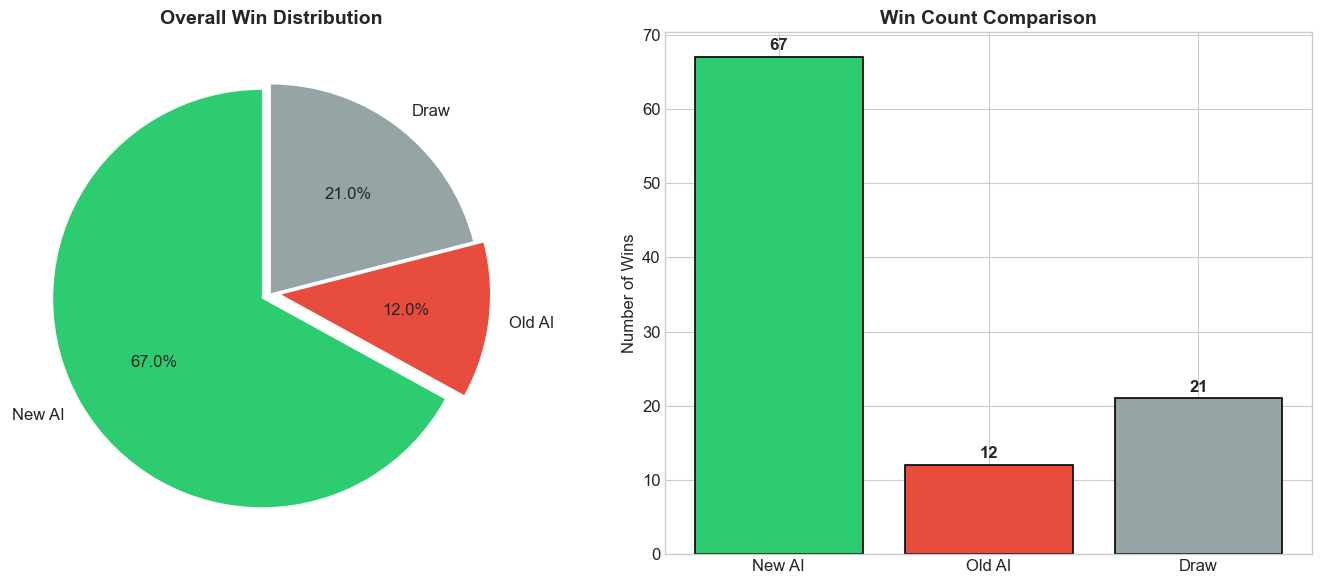

In [11]:
colors = ['#2ecc71', '#e74c3c', '#95a5a6']
labels = ['New AI', 'Old AI', 'Draw']
sizes = [new_ai_wins, old_ai_wins, draws]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

wedges, texts, autotexts = axes[0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
                                        startangle=90, explode=(0.05, 0.05, 0))
axes[0].set_title('Overall Win Distribution', fontsize=14, fontweight='bold')

x = np.arange(len(labels))
bars = axes[1].bar(x, sizes, color=colors, edgecolor='black', linewidth=1.2)
axes[1].set_xticks(x)
axes[1].set_xticklabels(labels)
axes[1].set_ylabel('Number of Wins')
axes[1].set_title('Win Count Comparison', fontsize=14, fontweight='bold')

for bar, size in zip(bars, sizes):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                 str(size), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(results_dir, 'overall_wins.png'), dpi=150, bbox_inches='tight')
plt.show()

## Phase Analysis

Compare performance when each AI plays first.

In [12]:
phase1_df = games_df[games_df['phase'] == 1]
phase2_df = games_df[games_df['phase'] == 2]

phase1_wins = phase1_df['winner'].value_counts()
phase2_wins = phase2_df['winner'].value_counts()

print("=" * 50)
print("PHASE 1: New AI Plays First")
print("=" * 50)
print(f"Games: {len(phase1_df)}")
print(f"New AI Wins: {phase1_wins.get('NewAI', 0)} ({phase1_wins.get('NewAI', 0)/len(phase1_df)*100:.1f}%)")
print(f"Old AI Wins: {phase1_wins.get('OldAI', 0)} ({phase1_wins.get('OldAI', 0)/len(phase1_df)*100:.1f}%)")
print(f"Draws: {phase1_wins.get('Draw', 0)} ({phase1_wins.get('Draw', 0)/len(phase1_df)*100:.1f}%)")

print("\n" + "=" * 50)
print("PHASE 2: Old AI Plays First")
print("=" * 50)
print(f"Games: {len(phase2_df)}")
print(f"New AI Wins: {phase2_wins.get('NewAI', 0)} ({phase2_wins.get('NewAI', 0)/len(phase2_df)*100:.1f}%)")
print(f"Old AI Wins: {phase2_wins.get('OldAI', 0)} ({phase2_wins.get('OldAI', 0)/len(phase2_df)*100:.1f}%)")
print(f"Draws: {phase2_wins.get('Draw', 0)} ({phase2_wins.get('Draw', 0)/len(phase2_df)*100:.1f}%)")

PHASE 1: New AI Plays First
Games: 50
New AI Wins: 47 (94.0%)
Old AI Wins: 3 (6.0%)
Draws: 0 (0.0%)

PHASE 2: Old AI Plays First
Games: 50
New AI Wins: 20 (40.0%)
Old AI Wins: 9 (18.0%)
Draws: 21 (42.0%)


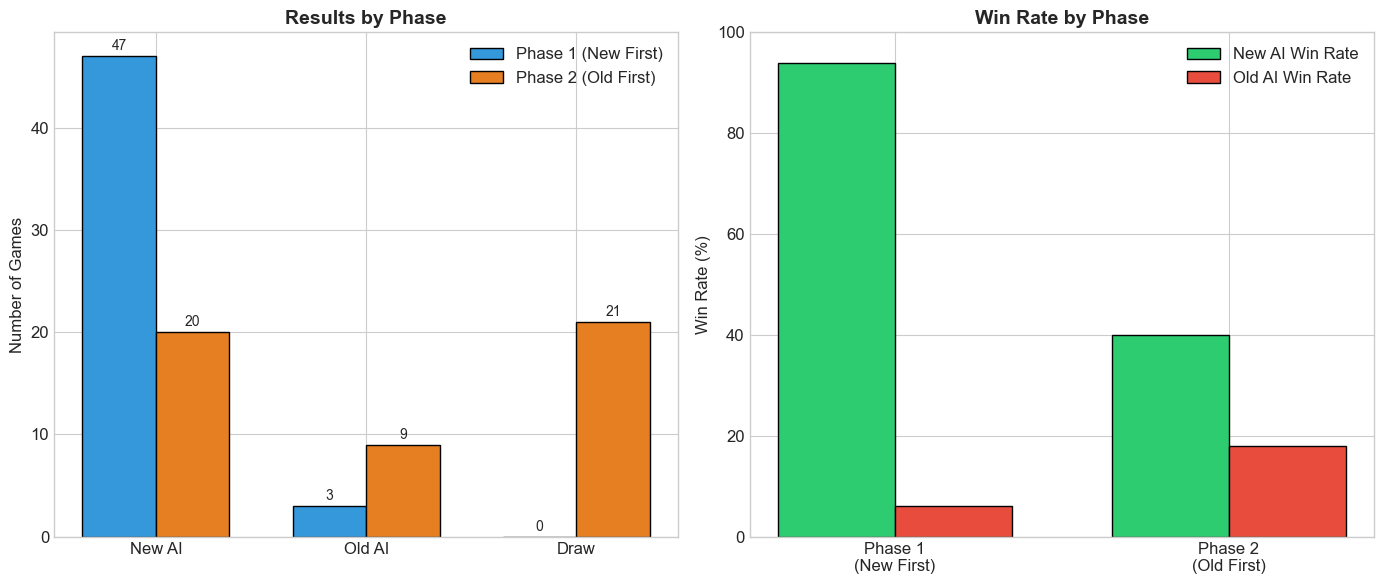

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

categories = ['New AI', 'Old AI', 'Draw']
phase1_values = [phase1_wins.get('NewAI', 0), phase1_wins.get('OldAI', 0), phase1_wins.get('Draw', 0)]
phase2_values = [phase2_wins.get('NewAI', 0), phase2_wins.get('OldAI', 0), phase2_wins.get('Draw', 0)]

x = np.arange(len(categories))
width = 0.35

bars1 = axes[0].bar(x - width/2, phase1_values, width, label='Phase 1 (New First)', color='#3498db', edgecolor='black')
bars2 = axes[0].bar(x + width/2, phase2_values, width, label='Phase 2 (Old First)', color='#e67e22', edgecolor='black')

axes[0].set_xticks(x)
axes[0].set_xticklabels(categories)
axes[0].set_ylabel('Number of Games')
axes[0].set_title('Results by Phase', fontsize=14, fontweight='bold')
axes[0].legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2, height + 0.3, str(int(height)), 
                     ha='center', va='bottom', fontsize=10)

phase1_new_rate = phase1_wins.get('NewAI', 0) / len(phase1_df) * 100
phase2_new_rate = phase2_wins.get('NewAI', 0) / len(phase2_df) * 100
phase1_old_rate = phase1_wins.get('OldAI', 0) / len(phase1_df) * 100
phase2_old_rate = phase2_wins.get('OldAI', 0) / len(phase2_df) * 100

phases = ['Phase 1\n(New First)', 'Phase 2\n(Old First)']
new_rates = [phase1_new_rate, phase2_new_rate]
old_rates = [phase1_old_rate, phase2_old_rate]

x2 = np.arange(len(phases))
axes[1].bar(x2 - width/2, new_rates, width, label='New AI Win Rate', color='#2ecc71', edgecolor='black')
axes[1].bar(x2 + width/2, old_rates, width, label='Old AI Win Rate', color='#e74c3c', edgecolor='black')

axes[1].set_xticks(x2)
axes[1].set_xticklabels(phases)
axes[1].set_ylabel('Win Rate (%)')
axes[1].set_title('Win Rate by Phase', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].set_ylim(0, 100)

plt.tight_layout()
plt.savefig(os.path.join(results_dir, 'phase_comparison.png'), dpi=150, bbox_inches='tight')
plt.show()

## Game Time Analysis

In [14]:
avg_game_time = games_df['game_time'].mean()
avg_game_time_phase1 = phase1_df['game_time'].mean()
avg_game_time_phase2 = phase2_df['game_time'].mean()

print("=" * 50)
print("GAME TIME STATISTICS")
print("=" * 50)
print(f"Overall Average Game Time: {avg_game_time:.2f} seconds")
print(f"Phase 1 Average Game Time: {avg_game_time_phase1:.2f} seconds")
print(f"Phase 2 Average Game Time: {avg_game_time_phase2:.2f} seconds")
print(f"\nMin Game Time: {games_df['game_time'].min():.2f} seconds")
print(f"Max Game Time: {games_df['game_time'].max():.2f} seconds")
print(f"Std Dev: {games_df['game_time'].std():.2f} seconds")

GAME TIME STATISTICS
Overall Average Game Time: 45.59 seconds
Phase 1 Average Game Time: 58.33 seconds
Phase 2 Average Game Time: 32.84 seconds

Min Game Time: 22.35 seconds
Max Game Time: 152.17 seconds
Std Dev: 28.82 seconds


C:\Users\paaar\AppData\Local\Temp\ipykernel_22976\3725114174.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1].boxplot([phase1_df['game_time'], phase2_df['game_time']],


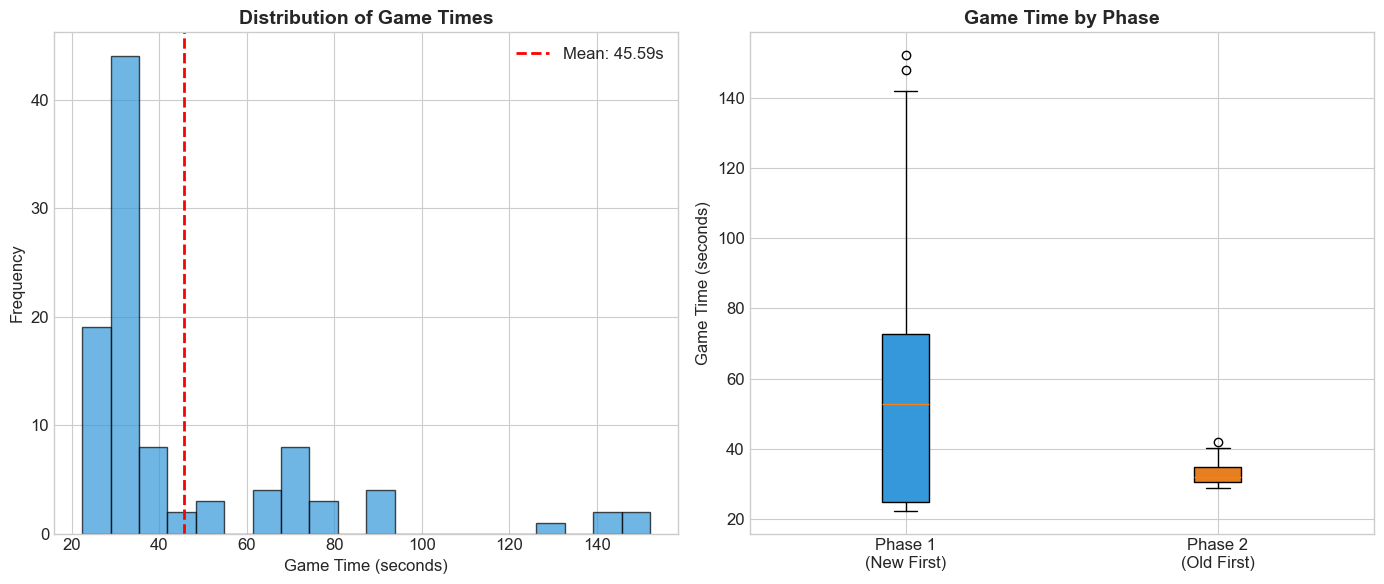

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].hist(games_df['game_time'], bins=20, color='#3498db', edgecolor='black', alpha=0.7)
axes[0].axvline(avg_game_time, color='red', linestyle='--', linewidth=2, label=f'Mean: {avg_game_time:.2f}s')
axes[0].set_xlabel('Game Time (seconds)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Game Times', fontsize=14, fontweight='bold')
axes[0].legend()

bp = axes[1].boxplot([phase1_df['game_time'], phase2_df['game_time']], 
                     labels=['Phase 1\n(New First)', 'Phase 2\n(Old First)'],
                     patch_artist=True)
bp['boxes'][0].set_facecolor('#3498db')
bp['boxes'][1].set_facecolor('#e67e22')
axes[1].set_ylabel('Game Time (seconds)')
axes[1].set_title('Game Time by Phase', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(results_dir, 'game_times.png'), dpi=150, bbox_inches='tight')
plt.show()

## Move Time Analysis

In [16]:
avg_new_move_time = games_df['new_ai_avg_move_time'].mean() * 1000
avg_old_move_time = games_df['old_ai_avg_move_time'].mean() * 1000

phase1_new_move_time = phase1_df['new_ai_avg_move_time'].mean() * 1000
phase1_old_move_time = phase1_df['old_ai_avg_move_time'].mean() * 1000
phase2_new_move_time = phase2_df['new_ai_avg_move_time'].mean() * 1000
phase2_old_move_time = phase2_df['old_ai_avg_move_time'].mean() * 1000

print("=" * 50)
print("MOVE TIME STATISTICS (milliseconds)")
print("=" * 50)
print(f"\nOverall Average Move Time:")
print(f"  New AI: {avg_new_move_time:.2f} ms")
print(f"  Old AI: {avg_old_move_time:.2f} ms")
print(f"\nPhase 1 (New AI First):")
print(f"  New AI: {phase1_new_move_time:.2f} ms")
print(f"  Old AI: {phase1_old_move_time:.2f} ms")
print(f"\nPhase 2 (Old AI First):")
print(f"  New AI: {phase2_new_move_time:.2f} ms")
print(f"  Old AI: {phase2_old_move_time:.2f} ms")

MOVE TIME STATISTICS (milliseconds)

Overall Average Move Time:
  New AI: 1996.68 ms
  Old AI: 429.49 ms

Phase 1 (New AI First):
  New AI: 2587.86 ms
  Old AI: 583.34 ms

Phase 2 (Old AI First):
  New AI: 1405.51 ms
  Old AI: 275.64 ms


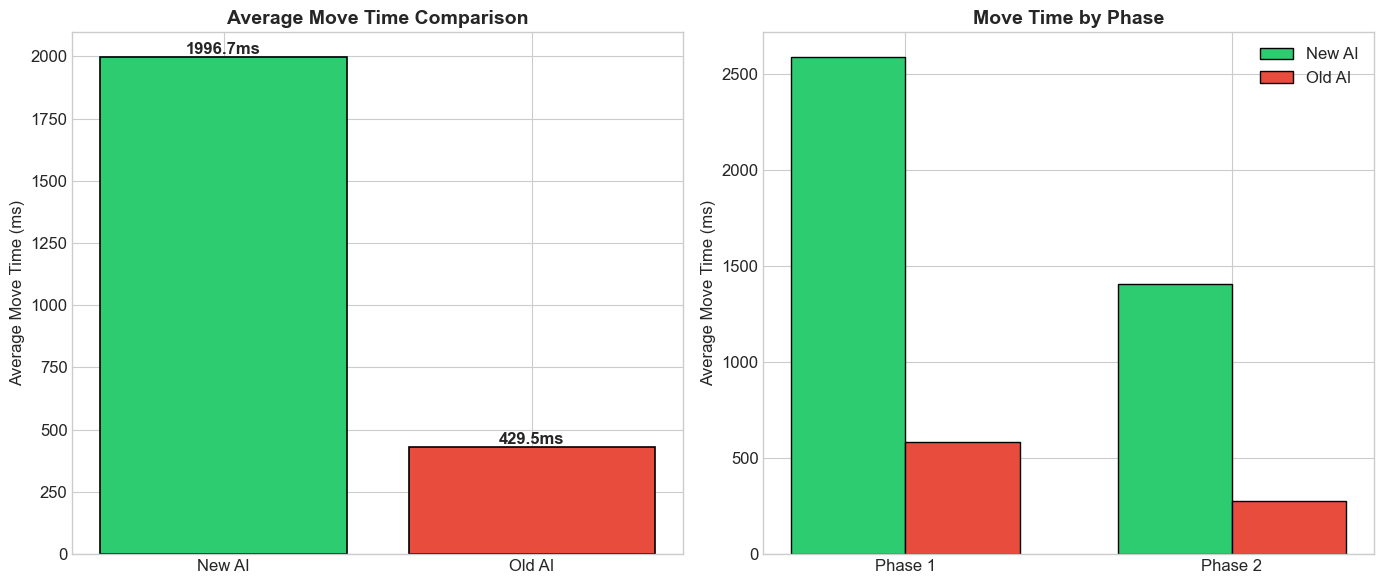

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

ais = ['New AI', 'Old AI']
times = [avg_new_move_time, avg_old_move_time]
colors_bar = ['#2ecc71', '#e74c3c']

bars = axes[0].bar(ais, times, color=colors_bar, edgecolor='black', linewidth=1.2)
axes[0].set_ylabel('Average Move Time (ms)')
axes[0].set_title('Average Move Time Comparison', fontsize=14, fontweight='bold')

for bar, time_val in zip(bars, times):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                 f'{time_val:.1f}ms', ha='center', va='bottom', fontweight='bold')

phases_labels = ['Phase 1', 'Phase 2']
x = np.arange(len(phases_labels))
width = 0.35

new_times = [phase1_new_move_time, phase2_new_move_time]
old_times = [phase1_old_move_time, phase2_old_move_time]

axes[1].bar(x - width/2, new_times, width, label='New AI', color='#2ecc71', edgecolor='black')
axes[1].bar(x + width/2, old_times, width, label='Old AI', color='#e74c3c', edgecolor='black')

axes[1].set_xticks(x)
axes[1].set_xticklabels(phases_labels)
axes[1].set_ylabel('Average Move Time (ms)')
axes[1].set_title('Move Time by Phase', fontsize=14, fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.savefig(os.path.join(results_dir, 'move_times.png'), dpi=150, bbox_inches='tight')
plt.show()

## Move Time Progression

Analyze how move times change as the game progresses.

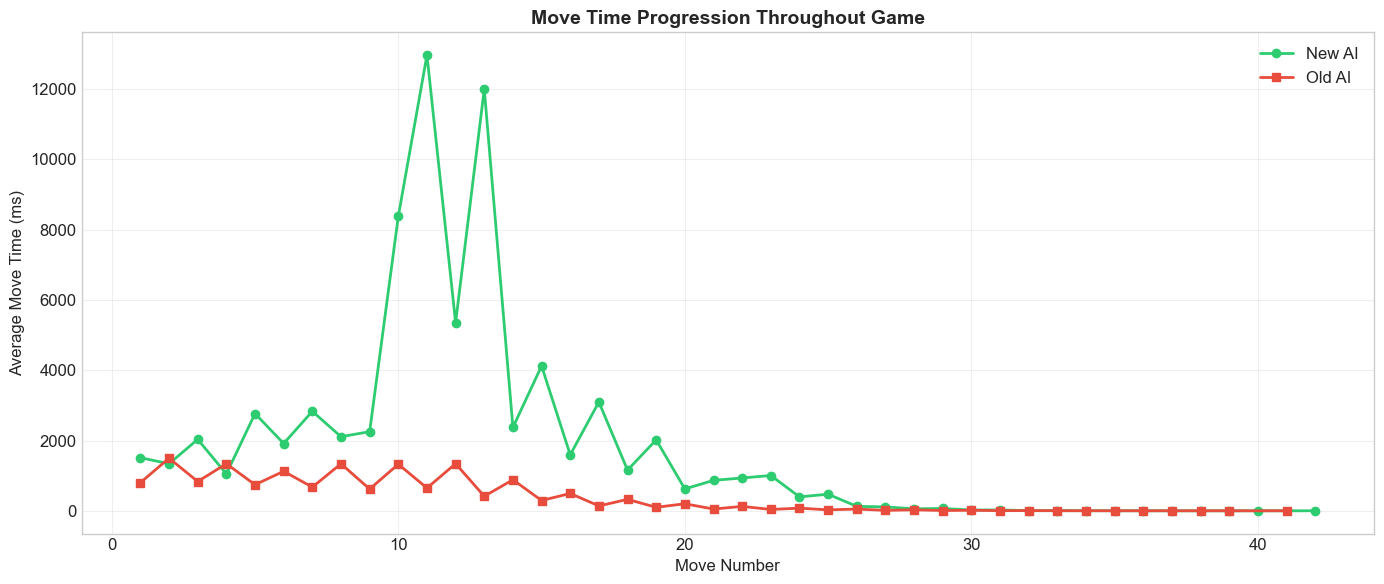

In [18]:
new_ai_moves = moves_df[moves_df['ai_name'] == 'NewAI']
old_ai_moves = moves_df[moves_df['ai_name'] == 'OldAI']

new_move_times_by_num = new_ai_moves.groupby('move_num')['move_time'].mean() * 1000
old_move_times_by_num = old_ai_moves.groupby('move_num')['move_time'].mean() * 1000

fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(new_move_times_by_num.index, new_move_times_by_num.values, 
        'o-', color='#2ecc71', label='New AI', linewidth=2, markersize=6)
ax.plot(old_move_times_by_num.index, old_move_times_by_num.values, 
        's-', color='#e74c3c', label='Old AI', linewidth=2, markersize=6)

ax.set_xlabel('Move Number')
ax.set_ylabel('Average Move Time (ms)')
ax.set_title('Move Time Progression Throughout Game', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(results_dir, 'move_progression.png'), dpi=150, bbox_inches='tight')
plt.show()

## Summary Statistics Table

In [19]:
summary_data = {
    'Metric': [
        'Total Games',
        'New AI Wins',
        'Old AI Wins', 
        'Draws',
        'New AI Win Rate (%)',
        'Old AI Win Rate (%)',
        'Avg Game Time (s)',
        'Avg New AI Move Time (ms)',
        'Avg Old AI Move Time (ms)',
        'Avg Moves per Game'
    ],
    'Overall': [
        total_games,
        new_ai_wins,
        old_ai_wins,
        draws,
        f'{new_ai_wins/total_games*100:.1f}',
        f'{old_ai_wins/total_games*100:.1f}',
        f'{avg_game_time:.2f}',
        f'{avg_new_move_time:.2f}',
        f'{avg_old_move_time:.2f}',
        f'{games_df["total_moves"].mean():.1f}'
    ],
    'Phase 1 (New First)': [
        len(phase1_df),
        phase1_wins.get('NewAI', 0),
        phase1_wins.get('OldAI', 0),
        phase1_wins.get('Draw', 0),
        f'{phase1_wins.get("NewAI", 0)/len(phase1_df)*100:.1f}',
        f'{phase1_wins.get("OldAI", 0)/len(phase1_df)*100:.1f}',
        f'{avg_game_time_phase1:.2f}',
        f'{phase1_new_move_time:.2f}',
        f'{phase1_old_move_time:.2f}',
        f'{phase1_df["total_moves"].mean():.1f}'
    ],
    'Phase 2 (Old First)': [
        len(phase2_df),
        phase2_wins.get('NewAI', 0),
        phase2_wins.get('OldAI', 0),
        phase2_wins.get('Draw', 0),
        f'{phase2_wins.get("NewAI", 0)/len(phase2_df)*100:.1f}',
        f'{phase2_wins.get("OldAI", 0)/len(phase2_df)*100:.1f}',
        f'{avg_game_time_phase2:.2f}',
        f'{phase2_new_move_time:.2f}',
        f'{phase2_old_move_time:.2f}',
        f'{phase2_df["total_moves"].mean():.1f}'
    ]
}

summary_df = pd.DataFrame(summary_data)
summary_df.to_csv(os.path.join(results_dir, 'summary_statistics.csv'), index=False)

print("\n" + "=" * 80)
print("COMPLETE SUMMARY STATISTICS")
print("=" * 80)
print(summary_df.to_string(index=False))
print("=" * 80)


COMPLETE SUMMARY STATISTICS
                   Metric Overall Phase 1 (New First) Phase 2 (Old First)
              Total Games     100                  50                  50
              New AI Wins      67                  47                  20
              Old AI Wins      12                   3                   9
                    Draws      21                   0                  21
      New AI Win Rate (%)    67.0                94.0                40.0
      Old AI Win Rate (%)    12.0                 6.0                18.0
        Avg Game Time (s)   45.59               58.33               32.84
Avg New AI Move Time (ms) 1996.68             2587.86             1405.51
Avg Old AI Move Time (ms)  429.49              583.34              275.64
       Avg Moves per Game    37.4                35.6                39.3


## Conclusion

In [20]:
print("\n" + "=" * 60)
print("CONCLUSION")
print("=" * 60)

if new_ai_wins > old_ai_wins:
    improvement = (new_ai_wins - old_ai_wins) / max(old_ai_wins, 1) * 100
    print(f"\n>>> NEW AI is STRONGER! <<<")
    print(f"\nThe New AI won {new_ai_wins} games vs {old_ai_wins} for Old AI.")
    print(f"This represents a {improvement:.1f}% improvement in win rate.")
elif old_ai_wins > new_ai_wins:
    print(f"\n>>> OLD AI performed better <<<")
    print(f"\nThe Old AI won {old_ai_wins} games vs {new_ai_wins} for New AI.")
    print(f"The advanced evaluation may need further tuning.")
else:
    print(f"\n>>> TIED! <<<")
    print(f"\nBoth AIs won {new_ai_wins} games each.")

if avg_new_move_time < avg_old_move_time:
    speedup = (avg_old_move_time - avg_new_move_time) / avg_old_move_time * 100
    print(f"\nNew AI is {speedup:.1f}% faster per move on average.")
else:
    slowdown = (avg_new_move_time - avg_old_move_time) / avg_old_move_time * 100
    print(f"\nNew AI is {slowdown:.1f}% slower per move (due to deeper analysis).")

print("\n" + "=" * 60)


CONCLUSION

>>> NEW AI is STRONGER! <<<

The New AI won 67 games vs 12 for Old AI.
This represents a 458.3% improvement in win rate.

New AI is 364.9% slower per move (due to deeper analysis).

